In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libaries imported")

Libaries imported


In [3]:
df = pd.read_csv('/content/Obesity Classification.csv')
print("dataframe of dataset created")

dataframe of dataset created


In [4]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df.Label)
df['Gender'] = le.fit_transform(df.Gender)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


#Cleaning DataSet

In [8]:
#finding NULL instances
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [31]:
df.groupby('BMI')['Label'].mean()

,Label
BMI,
3.9,3.0
5.6,3.0
8.3,3.0
10.0,3.0
13.3,3.0
16.7,3.0
18.7,3.0
20.0,3.0
21.2,0.0


In [33]:
 # Substituting NULL with MEAN values
df['BMI']=df.groupby("Label")['BMI'].transform(lambda x: x.fillna(x.mean()))

# Doing train_test_split

In [36]:
X= df.iloc[:,:-1] #X will be: Age	Gender	Height	Weight	BMI
y= df.iloc[:,-1] #Y y will be:Label

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the model

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [39]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  100.0


# Checking accuracy of training dataset

In [40]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

1.0

# Visualizing our nal decision tree

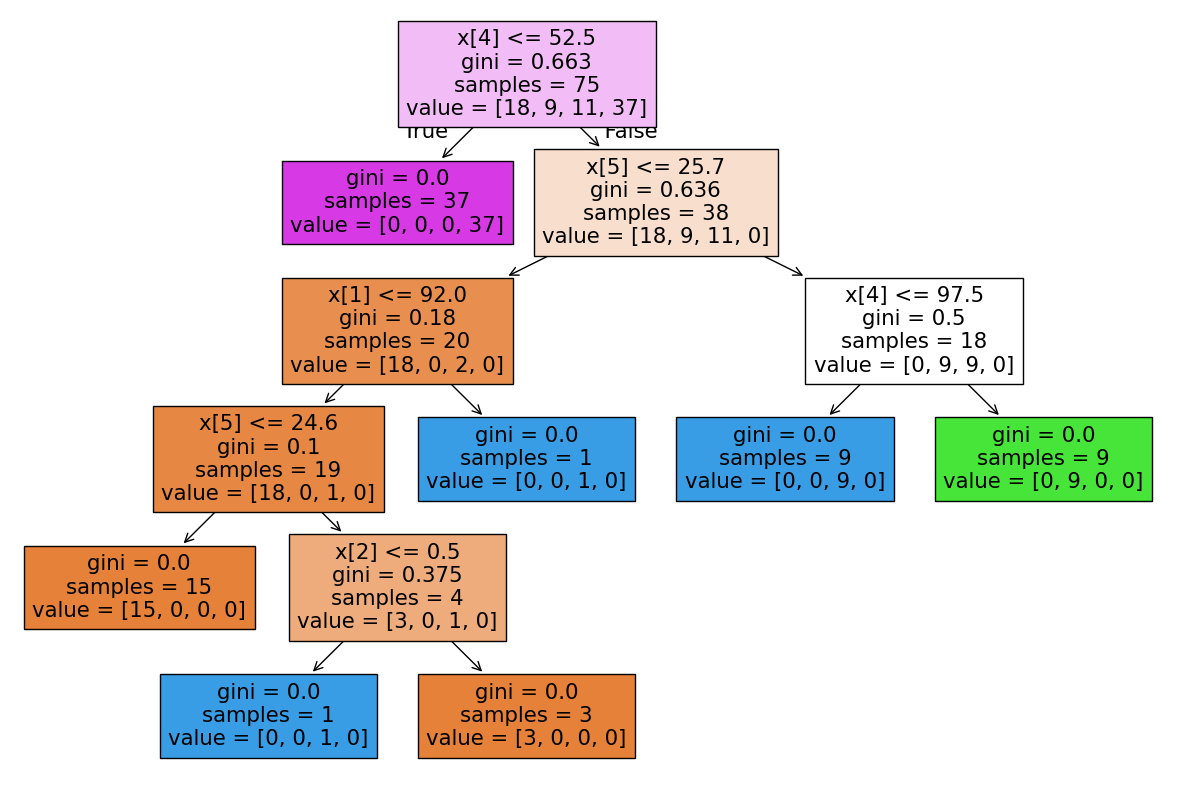

In [41]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Evaluating our test dataset

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        10

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

[[11  0  0  0]
 [ 0  3  0  0]
 [ 0  0  9  0]
 [ 0  0  0 10]]


# Evaluating our training dataset

In [16]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        37

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[18  0  0  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  0 37]]


# Finding false positive rate and true positive rate

In [43]:
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Convert y_test and y_pred to binary values
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_pred_binary = lb.transform(predictions_test)
dt_probs = clf.predict_proba(X_test)[:,1]
# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary[:, 1], dt_probs)

# Print the results
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Threshold :", thresholds_dt)

FPR : [0. 0. 1.]
TPR : [0. 1. 1.]
Threshold : [inf  1.  0.]


# Plotting ROC curve for our Decision Tree

In [44]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

np.float64(1.0)

In [45]:
def plot_roc_curve(fpr, tpr):
    # Indent the code block within the function
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

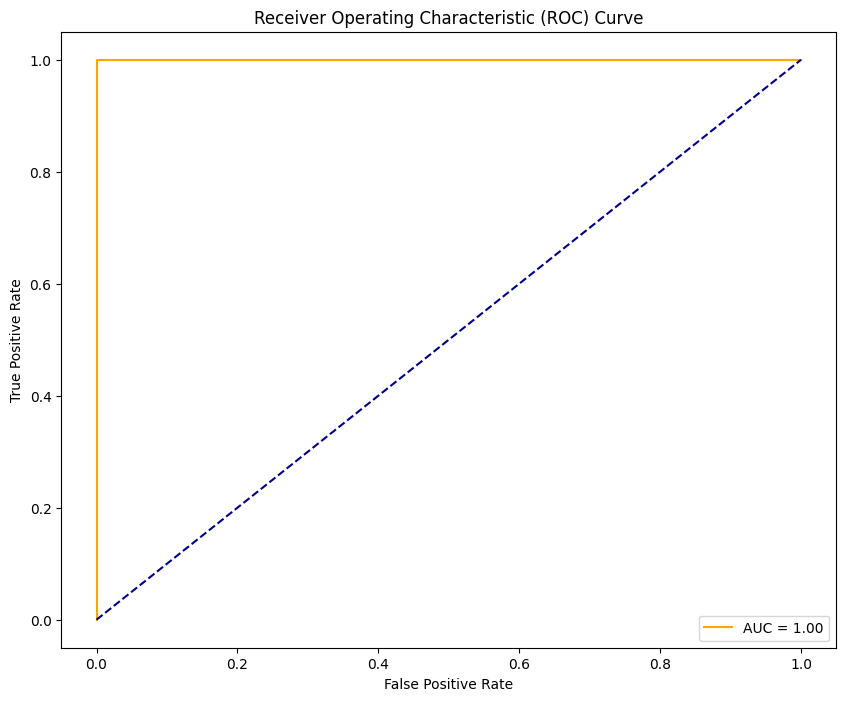

In [46]:
plot_roc_curve(fpr_dt,tpr_dt)

# Pruning of our decision tree

In [47]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

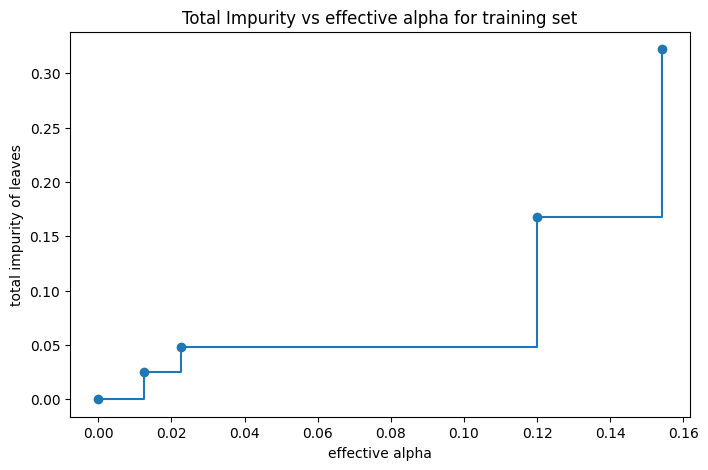

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [49]:
clfs = []
for ccp_alpha in ccp_alphas:
    # Indent the lines within the loop
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.34100584795321637


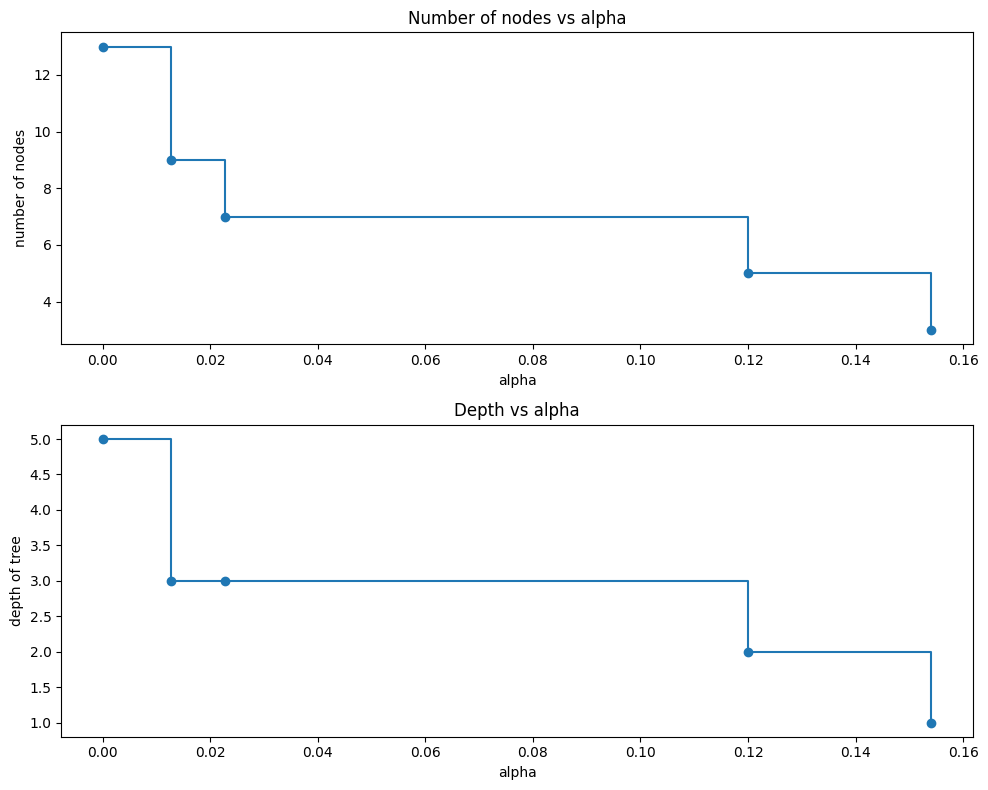

In [50]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

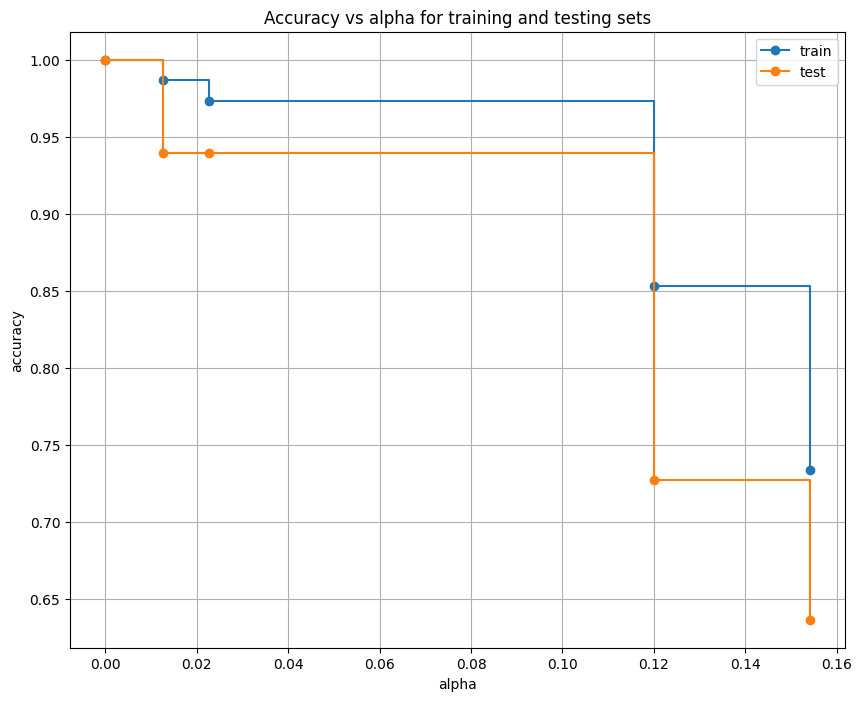

In [51]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning

In [52]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

# Accuracy of test dataset

In [53]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.9393939393939394

# Accuracy of training dataset

In [54]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.9866666666666667

# Visualizing after pruning

[Text(0.375, 0.875, 'x[4] <= 52.5\ngini = 0.663\nsamples = 75\nvalue = [18, 9, 11, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 0, 37]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[5] <= 25.7\ngini = 0.636\nsamples = 38\nvalue = [18, 9, 11, 0]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[1] <= 92.0\ngini = 0.18\nsamples = 20\nvalue = [18, 0, 2, 0]'),
 Text(0.125, 0.125, 'gini = 0.1\nsamples = 19\nvalue = [18, 0, 1, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.75, 0.375, 'x[4] <= 97.5\ngini = 0.5\nsamples = 18\nvalue = [0, 9, 9, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]')]

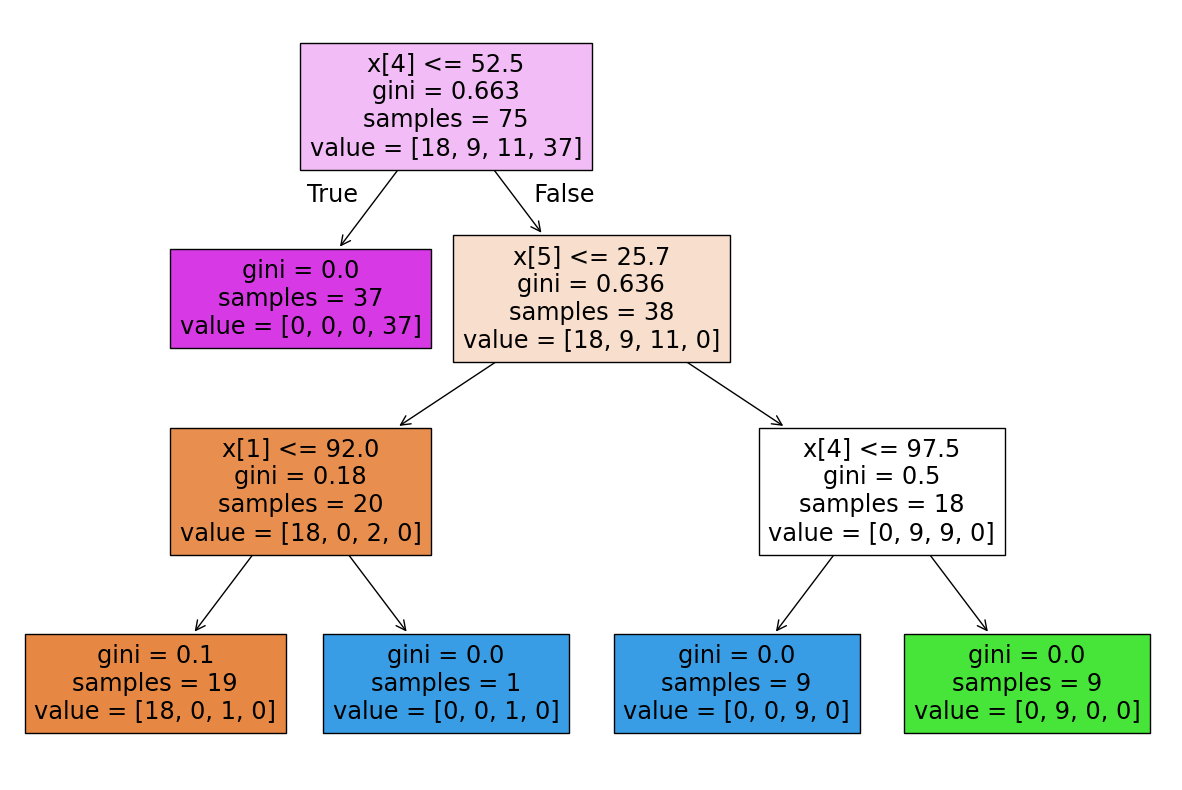

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)